# Predicting Absenteeism in the Workplace

In this project, we developed several models to predict absenteeism in the workplace, using data collected between 2007 and 2010 for a courier company in Brazil. The data is available [here](https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work).

[Part 1: Exploratory Data Analysis](#Part-1:-Exploratory-Data-Analysis)

[Part 2: Feature Engineering](#Part-2:-Feature-Engineering)

[Part 3: Linear Modeling](#Part-3:-Linear-Modeling)
- [Train test split](#First-split-data-into-training-and-testing-sets)
- [Linear regression](#Linear-Regression)
- [Linear regression with recursive feature engineering](#Linear-Regression-w/-RFE)
- [Lasso regularization](#Lasso-Regularization)
- [Cross validation](#K-folds-cross-validation)

[Part 4: Time series](#Part-4:-Time-series-analysis)

[Part 5: Logistic regression](#Part-5:-Logistic-regression)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import os
import sys
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../../data/01_raw/Absenteeism_at_work.csv', delimiter=';')

In [3]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [5]:
df.shape

(740, 21)

In [6]:
df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

# Part 1: Exploratory Data Analysis

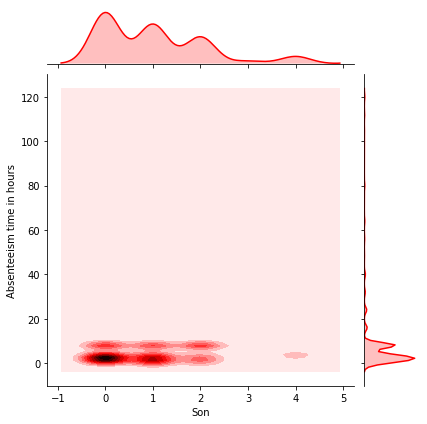

In [7]:
sns.jointplot(x='Son', y='Absenteeism time in hours', data=df, color='red', kind='kde')

### From the above graph, we notice that employees with no children and employees with one or two tend to miss more hours. However,employees with three or more children tend to miss less hours. This can be explained by the scenario that parents with more than three employees are more likely to have older childen who can care for their youngests. As a result, those parents with older children may have more times to focus on their work. 

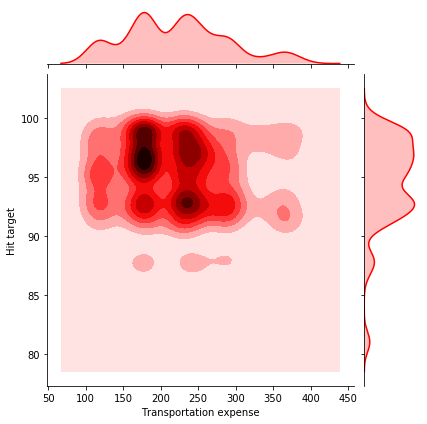

In [8]:
sns.jointplot(x='Transportation expense', y='Hit target', data=df, color='red', kind='kde')

#### Creating a countplot for the group age of employees

Text(0.5, 0, 'Age')

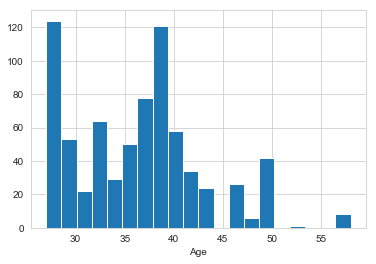

In [9]:
sns.set_style('whitegrid')
df['Age'].hist(bins=20)
plt.xlabel('Age')

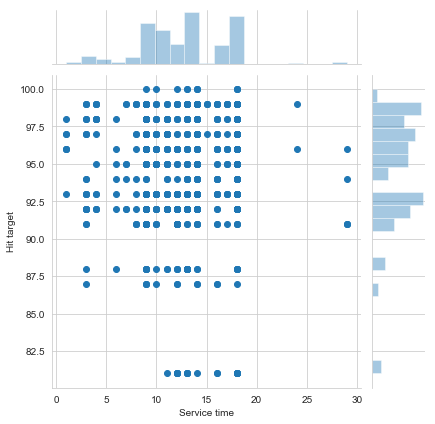

In [10]:
sns.jointplot(x='Service time',y='Hit target',data=df)

#### Creating a count plot for the reasons of absence

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text yticklabel objects>)

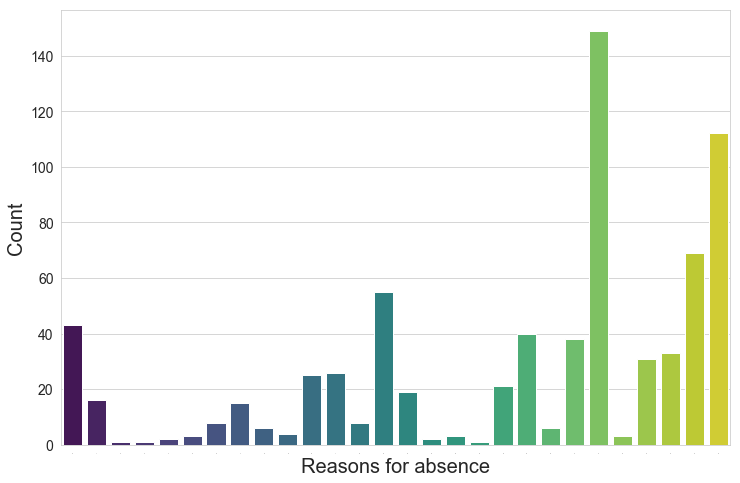

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x='Reason for absence',data=df,palette='viridis')
plt.xlabel('Reasons for absence', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=1)
plt.yticks(fontsize=14)

Interpretation of some reasons of absence:

- medical consultation (23)
- blood donation (24)
- laboratory examination (25)
- unjustified absence (26)
- physiotherapy (27)
- dental consultation (28)

# Part 2: Feature Engineering

In [12]:
df['medical_consult_dummy'] = (df['Reason for absence'] == 23).astype(int)
df['dental_consult_dummy'] = (df['Reason for absence'] == 28).astype(int)
df['genitourinary_dummy'] = (df['Reason for absence'] == 14).astype(int)
dow = pd.get_dummies(df['Day of the week'])
dow.columns = ['mon_dummy', 'tue_dummy', 'wed_dummy', 'thu_dummy' ,'fri_dummy']
df = pd.concat([df, dow], axis=1)
print(df.shape)

(740, 29)


In [13]:
df.columns = df.columns.str.replace(' ', '_')  # remove spaces from column titles

#### Dropping rows where Absenteeism time in hours is equal or greater than 24

In [14]:
df1 = df[df['Absenteeism_time_in_hours'] < 24]
df.isna().sum()

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
medical_consult_dummy              0
dental_consult_dummy               0
genitourinary_dummy                0
mon_dummy                          0
tue_dummy                          0
wed_dummy                          0
t

In [15]:
print(df1.shape)

(696, 29)


In [16]:
df1.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours', 'medical_consult_dummy',
       'dental_consult_dummy', 'genitourinary_dummy', 'mon_dummy', 'tue_dummy',
       'wed_dummy', 'thu_dummy', 'fri_dummy'],
      dtype='object')

# Part 3: Linear Modeling

### First split data into training and testing sets

In [17]:
# removed 3 variables: the target, "reason" and "day of week" (both of which we dummied)
# removed 3 more vars: 'tue_dummy' (for collinearity issues), 'Weight', 'Height' (also for collinearity issues)
X = df1[['Month_of_absence','Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Body_mass_index', 'medical_consult_dummy',
       'dental_consult_dummy', 'genitourinary_dummy', 'mon_dummy', 
       'wed_dummy', 'thu_dummy', 'fri_dummy']]

In [18]:
y = df1['Absenteeism_time_in_hours']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Split `X_train` into `X_train_dummy` (for categorical variables) and `X_train_cont` (for continuous variables)

In [20]:
X_train = X_train.reset_index(drop=True)  # reset index so .concat() words
X_train.shape

(487, 22)

In [21]:
# 'tue_dummy', 
X_train_dummy = X_train[['Month_of_absence','Seasons','Disciplinary_failure','medical_consult_dummy', 'dental_consult_dummy', 'genitourinary_dummy',
       'mon_dummy', 'wed_dummy', 'thu_dummy', 'fri_dummy','Social_drinker', 'Social_smoker', 
       'Education', 'Son', 'Pet']]
X_train_dummy.shape

(487, 15)

In [22]:
# 'Weight', 'Height',
X_train_cont = X_train[['Transportation_expense','Distance_from_Residence_to_Work', 
                        'Service_time', 'Age','Work_load_Average/day_', 'Hit_target', 'Body_mass_index']]
X_train_cont.shape

(487, 7)

#### Split `X_test` into `X_test_dummy` (for categorical variables) and `X_test_cont` (for continuous variables)

In [23]:
X_test = X_test.reset_index(drop=True)  # reset index so .concat() works
X_test.shape

(209, 22)

In [24]:
# 'tue_dummy', 
X_test_dummy = X_test[['Month_of_absence','Seasons','Disciplinary_failure','medical_consult_dummy', 'dental_consult_dummy', 'genitourinary_dummy',
       'mon_dummy', 'wed_dummy', 'thu_dummy', 'fri_dummy','Social_drinker', 'Social_smoker', 
       'Education', 'Son', 'Pet']]
X_test_dummy.shape

(209, 15)

In [25]:
# 'Weight', 'Height', 
X_test_cont = X_test[['Transportation_expense','Distance_from_Residence_to_Work', 'Service_time', 'Age',
                      'Work_load_Average/day_', 'Hit_target', 'Body_mass_index']]
X_test_cont.shape

(209, 7)

#### Scale `X_train_cont` and `X_test_cont` (using `StandardScalar`)

In [26]:
scaler = StandardScaler()

In [27]:
# fit and transform training data
scaler.fit(X_train_cont)
X_train_cont_scaled = scaler.transform(X_train_cont)
X_train_cont_scaled = pd.DataFrame(X_train_cont_scaled, columns=X_train_cont.columns)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
# just transform the testing data
X_test_cont_scaled = scaler.transform(X_test_cont)
X_test_cont_scaled = pd.DataFrame(X_test_cont_scaled, columns=X_test_cont.columns)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


#### Combine `X_train_dummy` and `X_train_cont_scaled`

In [29]:
print(X_train_cont_scaled.shape)
print(X_train_dummy.shape)

(487, 7)
(487, 15)


In [30]:
X_train_scaled = pd.concat([X_train_dummy, X_train_cont_scaled], axis=1)
X_train_scaled.shape

(487, 22)

#### Combine `X_test_dummy` and `X_test_cont_scaled`

In [31]:
print(X_test_cont_scaled.shape)
print(X_test_dummy.shape)

(209, 7)
(209, 15)


In [32]:
X_test_scaled = pd.concat([X_test_dummy, X_test_cont_scaled], axis=1)
X_test_scaled.shape

(209, 22)

### Linear Regression

Using `X_train_scaled` and `X_test_scaled`

In [33]:
X_train_scaled.shape

(487, 22)

In [34]:
linreg = LinearRegression()
model1 = linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)

In [35]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.9223432512429963

In [36]:
r2_score(y_test, y_pred)

0.24857047236150986

#### Look at AIC/BIC using `statsmodels`

In [37]:
est = sm.OLS(list(y_train), X_train_scaled).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     54.58
Date:                Thu, 01 Aug 2019   Prob (F-statistic):          8.85e-114
Time:                        22:14:59   Log-Likelihood:                -1219.2
No. Observations:                 487   AIC:                             2482.
Df Residuals:                     465   BIC:                             2575.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Month_of_absence                    0.1628      0.052      3.102      0.002       0.060       0.266
Seasons                             0.2073      0.139      1.493      0.136      -0.065       0.480
Disciplinary_failure               -6.5533      0.635    -10.322      0.000      -7.801      -5.306
medical_consult_dummy              -2.3240      0.368     -6.313      0.000      -3.047      -1.601
dental_consult_dummy               -2.7981      0.425     -6.587      0.000      -3.633      -1.963
genitourinary_dummy                -0.5093      0.896     -0.568      0.570      -2.270       1.252
mon_dummy                           1.2598      0.421      2.995      0.003       0.433       2.086
wed_dummy                           1.0539      0.416      2.531      0.012       0.235       1.872
thu_dummy                           1.0140      0.437      2.322      0.021       0.156       1.872
fri_dummy                           0.2920      0.437      0.669      0.504      -0.566       1.150
Social_drinker                      2.0844      0.341      6.109      0.000       1.414       2.755
Social_smoker                       0.8601      0.576      1.494      0.136      -0.271       1.991
Education                           1.1592      0.195      5.937      0.000       0.776       1.543
Son                                 0.5846      0.141      4.147      0.000       0.308       0.862
Pet                                -0.1054      0.124     -0.848      0.397      -0.350       0.139
Transportation_expense              0.5116      0.172      2.967      0.003       0.173       0.850
Distance_from_Residence_to_Work    -0.4633      0.193     -2.396      0.017      -0.843      -0.083
Service_time                       -0.3253      0.256     -1.269      0.205      -0.829       0.178
Age                                -0.2969      0.216     -1.375      0.170      -0.721       0.127
Work_load_Average/day_              0.3328      0.151      2.197      0.029       0.035       0.630
Hit_target                         -0.1233      0.163     -0.756      0.450      -0.444       0.197
Body_mass_index                     0.4720      0.197      2.390      0.017       0.084       0.860
==============================================================================
Omnibus:                      106.048   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.578
Skew:                           1.107   Prob(JB):                     1.42e-55
Kurtosis:                       5.746   Cond. No.                         51.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear Regression w/ RFE

Recursive feature elimination

Using `X_train_scaled` and `y_train` to choose the top 15 most important features

In [38]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 15)
selector = selector.fit(X_train_scaled, y_train)

In [39]:
top_15_cols = X.columns[selector.support_]
X_train_scaled_t15 = X_train_scaled[top_15_cols]
X_test_scaled_t15 = X_test_scaled[top_15_cols]
X_test_scaled_t15.columns

Index(['Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Education', 'Son', 'Social_drinker', 'Pet',
       'Body_mass_index', 'medical_consult_dummy', 'dental_consult_dummy',
       'genitourinary_dummy', 'mon_dummy', 'thu_dummy', 'fri_dummy'],
      dtype='object')

In [40]:
linreg = LinearRegression()
model1 = linreg.fit(X_train_scaled_t15, y_train)
y_pred = linreg.predict(X_test_scaled_t15)

In [41]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.227637465701872

In [42]:
r2_score(y_test, y_pred)

0.08336739479390298

#### Look at AIC/BIC using `statsmodels`

In [43]:
est = sm.OLS(list(y_train), X_train_scaled_t15).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     56.37
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           5.50e-95
Time:                        22:14:59   Log-Likelihood:                -1280.0
No. Observations:                 487   AIC:                             2590.
Df Residuals:                     472   BIC:                             2653.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Transportation_expense              0.3998      0.191      2.089      0.037       0.024       0.776
Distance_from_Residence_to_Work    -0.4488      0.211     -2.127      0.034      -0.863      -0.034
Service_time                       -0.1383      0.277     -0.500      0.618      -0.682       0.406
Age                                -0.5204      0.240     -2.172      0.030      -0.991      -0.050
Education                           1.6162      0.180      8.987      0.000       1.263       1.970
Son                                 0.6856      0.153      4.469      0.000       0.384       0.987
Social_drinker                      2.3893      0.368      6.492      0.000       1.666       3.112
Pet                                 0.0540      0.135      0.401      0.688      -0.210       0.318
Body_mass_index                     0.3478      0.206      1.691      0.091      -0.056       0.752
medical_consult_dummy              -1.2159      0.382     -3.186      0.002      -1.966      -0.466
dental_consult_dummy               -1.7547      0.454     -3.867      0.000      -2.646      -0.863
genitourinary_dummy                 0.9955      0.993      1.003      0.316      -0.955       2.946
mon_dummy                           1.3244      0.416      3.187      0.002       0.508       2.141
thu_dummy                           0.5983      0.441      1.356      0.176      -0.269       1.465
fri_dummy                           0.1250      0.429      0.292      0.771      -0.718       0.968
==============================================================================
Omnibus:                       56.909   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.976
Skew:                           0.766   Prob(JB):                     4.78e-20
Kurtosis:                       4.428   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Lasso Regularization

In [44]:
from sklearn.linear_model import LassoCV, Ridge

lasso = LassoCV(eps=0.001)
lasso.fit(X_train_scaled, y_train)
print('Training r^2:', lasso.score(X_train_scaled, y_train))
print('Testing r^2:', lasso.score(X_test_scaled, y_test))
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_scaled))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_scaled))))

Training r^2: 0.37196469460914505
Testing r^2: 0.2536657949145882
Training RMSE: 2.7500195599991333
Testing RMSE: 2.9124184286062373


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


### K-folds cross validation

Use to verify the robustness of how we've split the data into training and testing sets

In [45]:
linreg = LinearRegression()
model1 = linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
# scores.append(model1.score(X_test, y_test))
np.mean(cross_val_score(linreg, X, y, cv=10))

0.20184050151872263

In [46]:
linreg = LinearRegression()
model1 = linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
# scores.append(model1.score(X_test, y_test))
np.mean(np.sqrt(np.negative(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))))

2.9352619482640274

# Part 4: Time series analysis

In [47]:
df1.shape

(696, 29)

#### More data cleaning

In [48]:
df1 = df1[df1.Month_of_absence != 0]  # drop rows where month is 
dmap = {2:'mon', 3:'tue', 4:'wed', 5:'thu', 6:'fri'}
df1['dow_label'] = df1.Day_of_the_week.map(dmap)

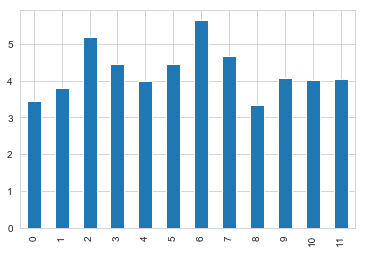

In [49]:
monthly_absent = df1.groupby('Month_of_absence')['Absenteeism_time_in_hours'].mean().reset_index()#.plot(kind='bar')
monthly_absent.columns = ['month', 'avg_hr_absent']
monthly_absent.avg_hr_absent.plot(kind='bar')#head()

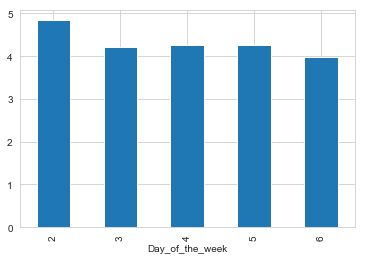

In [50]:
# dow_all = df1[['Day_of_the_week', 'Absenteeism_time_in_hours']]
dow_all = df1.groupby('Day_of_the_week')['Absenteeism_time_in_hours'].mean()#.reset_index()#.plot(kind='bar')
dow_all.plot(kind='bar')#head()

In [51]:
df_id_all = df1.groupby(['Month_of_absence', 'Day_of_the_week', 'dow_label'])['Absenteeism_time_in_hours'].mean().reset_index()#.mean()
# dow_id_all = dow_id_all.drop('Day_of_the_week', axis=1)
print(df_id_all.shape)
df_id_all.head(1)

(60, 4)


,Month_of_absence,Day_of_the_week,dow_label,Absenteeism_time_in_hours
0,1,2,mon,3.2


#### Look at the seasonal decomposition

<Figure size 432x288 with 0 Axes>

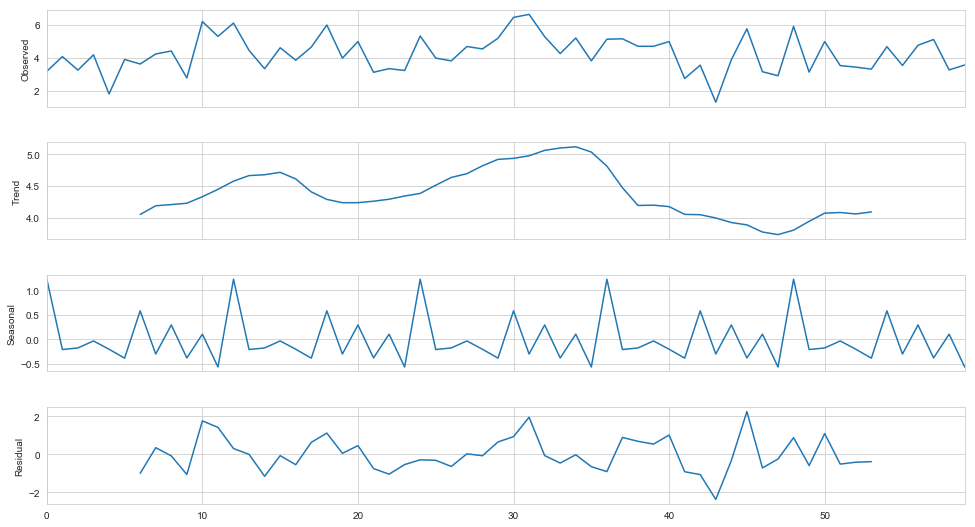

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_id_all['Absenteeism_time_in_hours'], freq=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

In [53]:
dow_id_all = df1.groupby(['ID', 'Day_of_the_week', 'dow_label'])['Absenteeism_time_in_hours'].sum().reset_index()#.mean()
# dow_id_all = dow_id_all.drop('Day_of_the_week', axis=1)
print(dow_id_all.shape)
dow_id_all.head(10)

(139, 4)


,ID,Day_of_the_week,dow_label,Absenteeism_time_in_hours
0,1,2,mon,39
1,1,3,tue,22
2,1,4,wed,9
3,1,5,thu,24
4,1,6,fri,27
5,2,2,mon,9
6,2,5,thu,8
7,2,6,fri,8
8,3,2,mon,107
9,3,3,tue,54


In [54]:
len(dow_id_all.ID.unique())

34

''

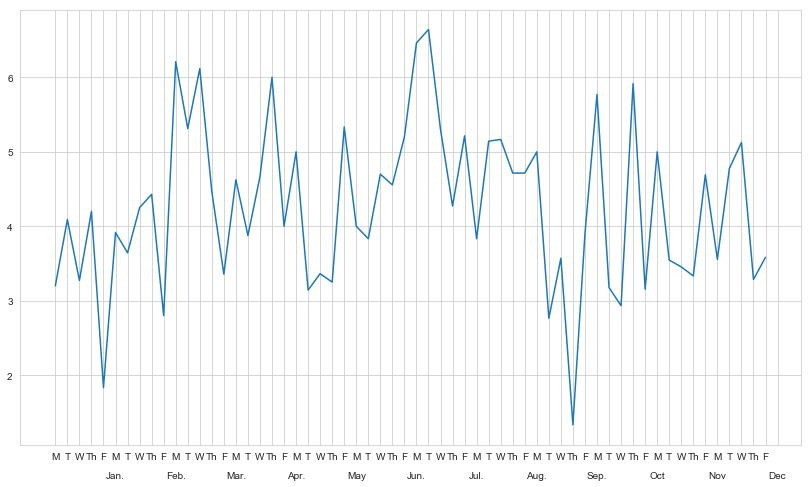

In [55]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)

xticks_minor = [5, 10, 15,20,25,30,35,40,45,50,55,60]

ax.plot(df_id_all.index, df_id_all.Absenteeism_time_in_hours)
# ax.set_xlabel('Month_day_of_the_week')
ax.set_xticks(range(0,61))
ax.set_xticklabels(np.array(['M', 'T', 'W', 'Th', 'F'] * 12))
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(np.array(['\n\nJan.', '\n\nFeb.', '\n\nMar.', '\n\nApr.', '\n\nMay', '\n\nJun.', '\n\nJul.', '\n\nAug.', '\n\nSep.', '\n\nOct', '\n\nNov', '\n\nDec'] * 12), minor=True )
;

# Part 5: Logistic regression

Incomplete, still working on this.

In [56]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,693.0,18.025974,11.095847,1.000,9.000,18.000,28.000,36.000
Reason_for_absence,693.0,19.683983,8.378147,0.000,13.000,23.000,27.000,28.000
Month_of_absence,693.0,6.337662,3.429510,1.000,3.000,6.000,9.000,12.000
Day_of_the_week,693.0,3.956710,1.421705,2.000,3.000,4.000,5.000,6.000
Seasons,693.0,2.536797,1.116295,1.000,2.000,3.000,4.000,4.000
Transportation_expense,693.0,221.600289,66.421651,118.000,179.000,225.000,260.000,388.000
Distance_from_Residence_to_Work,693.0,29.874459,14.875693,5.000,16.000,26.000,50.000,52.000
Service_time,693.0,12.493506,4.437951,1.000,9.000,12.000,16.000,29.000
Age,693.0,36.326118,6.405640,27.000,31.000,37.000,40.000,58.000
Work_load_Average/day_,693.0,270.577130,38.438426,205.917,244.387,264.249,284.853,378.884


In [57]:
df1.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours', 'medical_consult_dummy',
       'dental_consult_dummy', 'genitourinary_dummy', 'mon_dummy', 'tue_dummy',
       'wed_dummy', 'thu_dummy', 'fri_dummy', 'dow_label'],
      dtype='object')

In [58]:
df1['target_dummy'] = (df1['Hit_target'] > 98).astype(int)

In [59]:
df1.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours', 'medical_consult_dummy',
       'dental_consult_dummy', 'genitourinary_dummy', 'mon_dummy', 'tue_dummy',
       'wed_dummy', 'thu_dummy', 'fri_dummy', 'dow_label', 'target_dummy'],
      dtype='object')

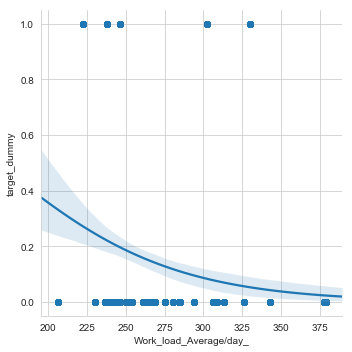

In [60]:
sns.lmplot(x='Work_load_Average/day_', y='target_dummy', data=df1, logistic=True)